In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV

from sklearn.metrics import f1_score, classification_report


In [4]:

data = pd.read_csv('C:/Users/Isnan Hidayat/Desktop/purwadhika/Remedial-Modul-3-main/Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
data.describe()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
data_eda = data.copy()

In [10]:
data_eda = data_eda[['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']]


In [11]:
data_eda

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [14]:
data_eda.describe()


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


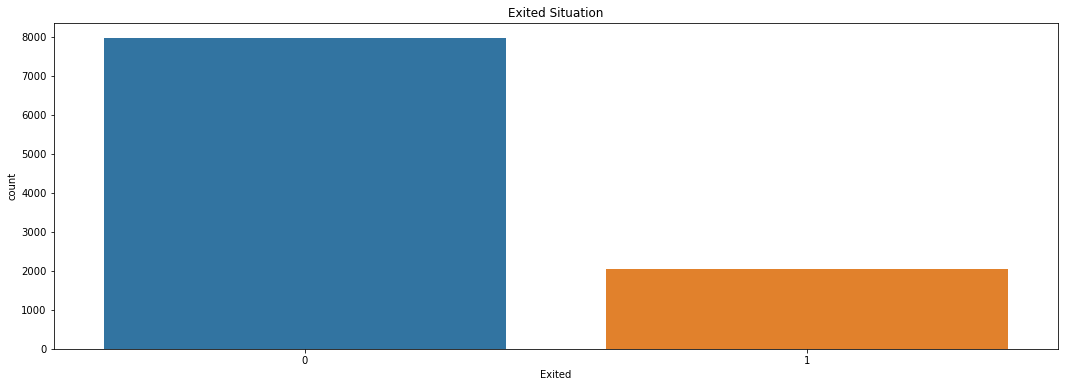

In [20]:
plt.figure(figsize=(18,6))
sns.countplot(x='Exited', data= data_eda)
plt.title('Exited Situation')
plt.show()

#### Based on the chart above, we can conclude that the amount of customer shich exited was one fifth the total of customer the company had.

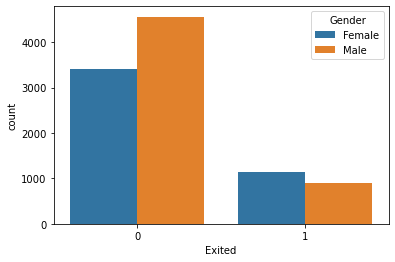

In [16]:
sns.countplot(x='Exited',data=data_eda,hue='Gender')


##### Based on the chart above, we can conclude that the majority of the customer which exit was female. Another insight is, in total, the number of customer which exited was one third the number of customer who did not.

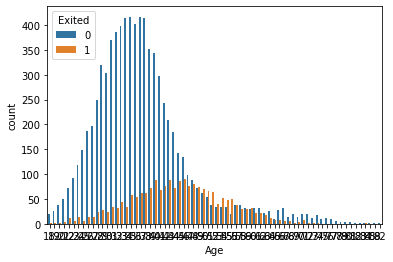

In [18]:
sns.countplot(x='Age',data=data_eda,hue='Exited')


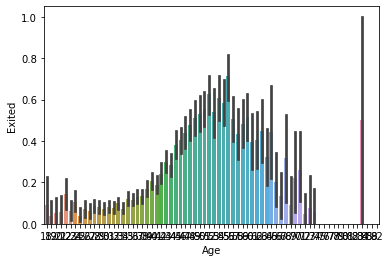

In [19]:
sns.barplot(x='Age', y='Exited', data=data_eda)


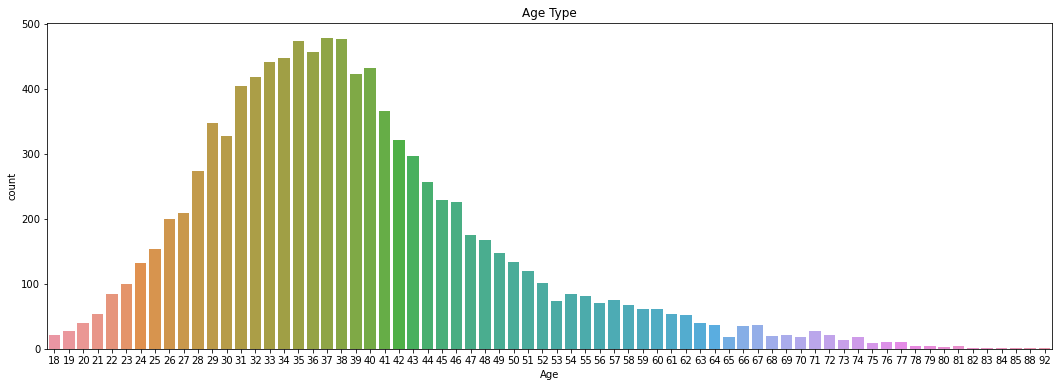

In [21]:
plt.figure(figsize=(18,6))
sns.countplot(x='Age', data= data_eda)
plt.title('Age Type')
plt.show()

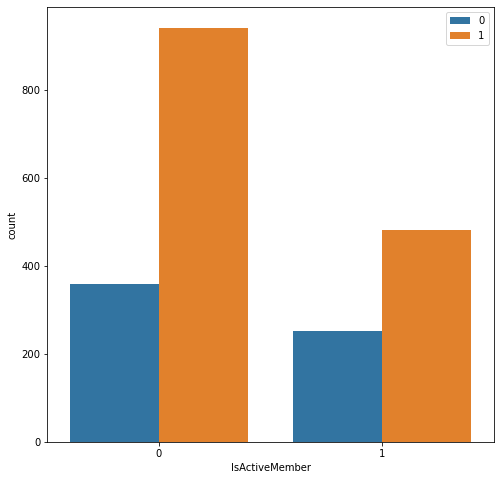

In [26]:
plt.figure(figsize=(8,8))
sns.countplot(data[data['Exited']==1]['IsActiveMember'], hue= data['HasCrCard'])
plt.legend(loc='upper right')

#### From the chart above we can conclude that the majority customer which exited were the ones who is not an activ member. in additional, those said customers numbers was mainly contributed by the ones which has credit cards. 

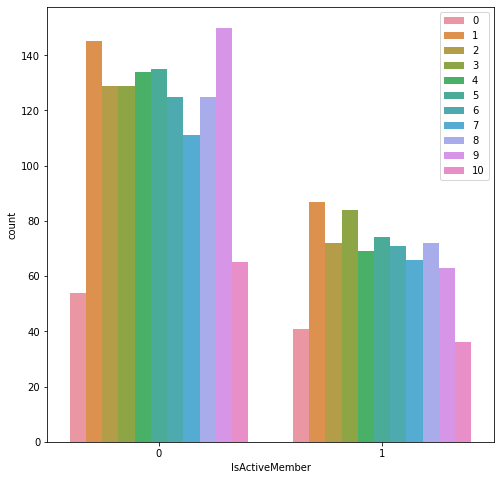

In [32]:
plt.figure(figsize=(8,8))
sns.countplot(data[data['Exited']==1]['IsActiveMember'], hue= data['Tenure'])
plt.legend(loc='upper right')

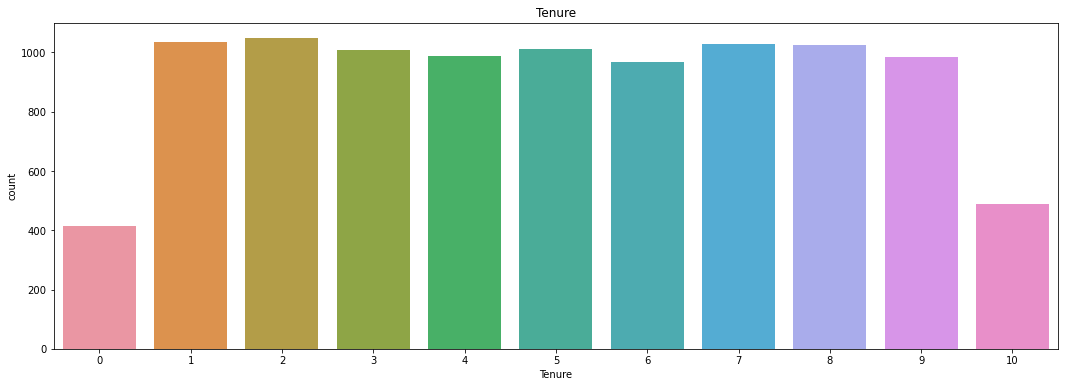

In [31]:
plt.figure(figsize=(18,6))
sns.countplot(x='Tenure', data= data_eda)
plt.title('Tenure')
plt.show()

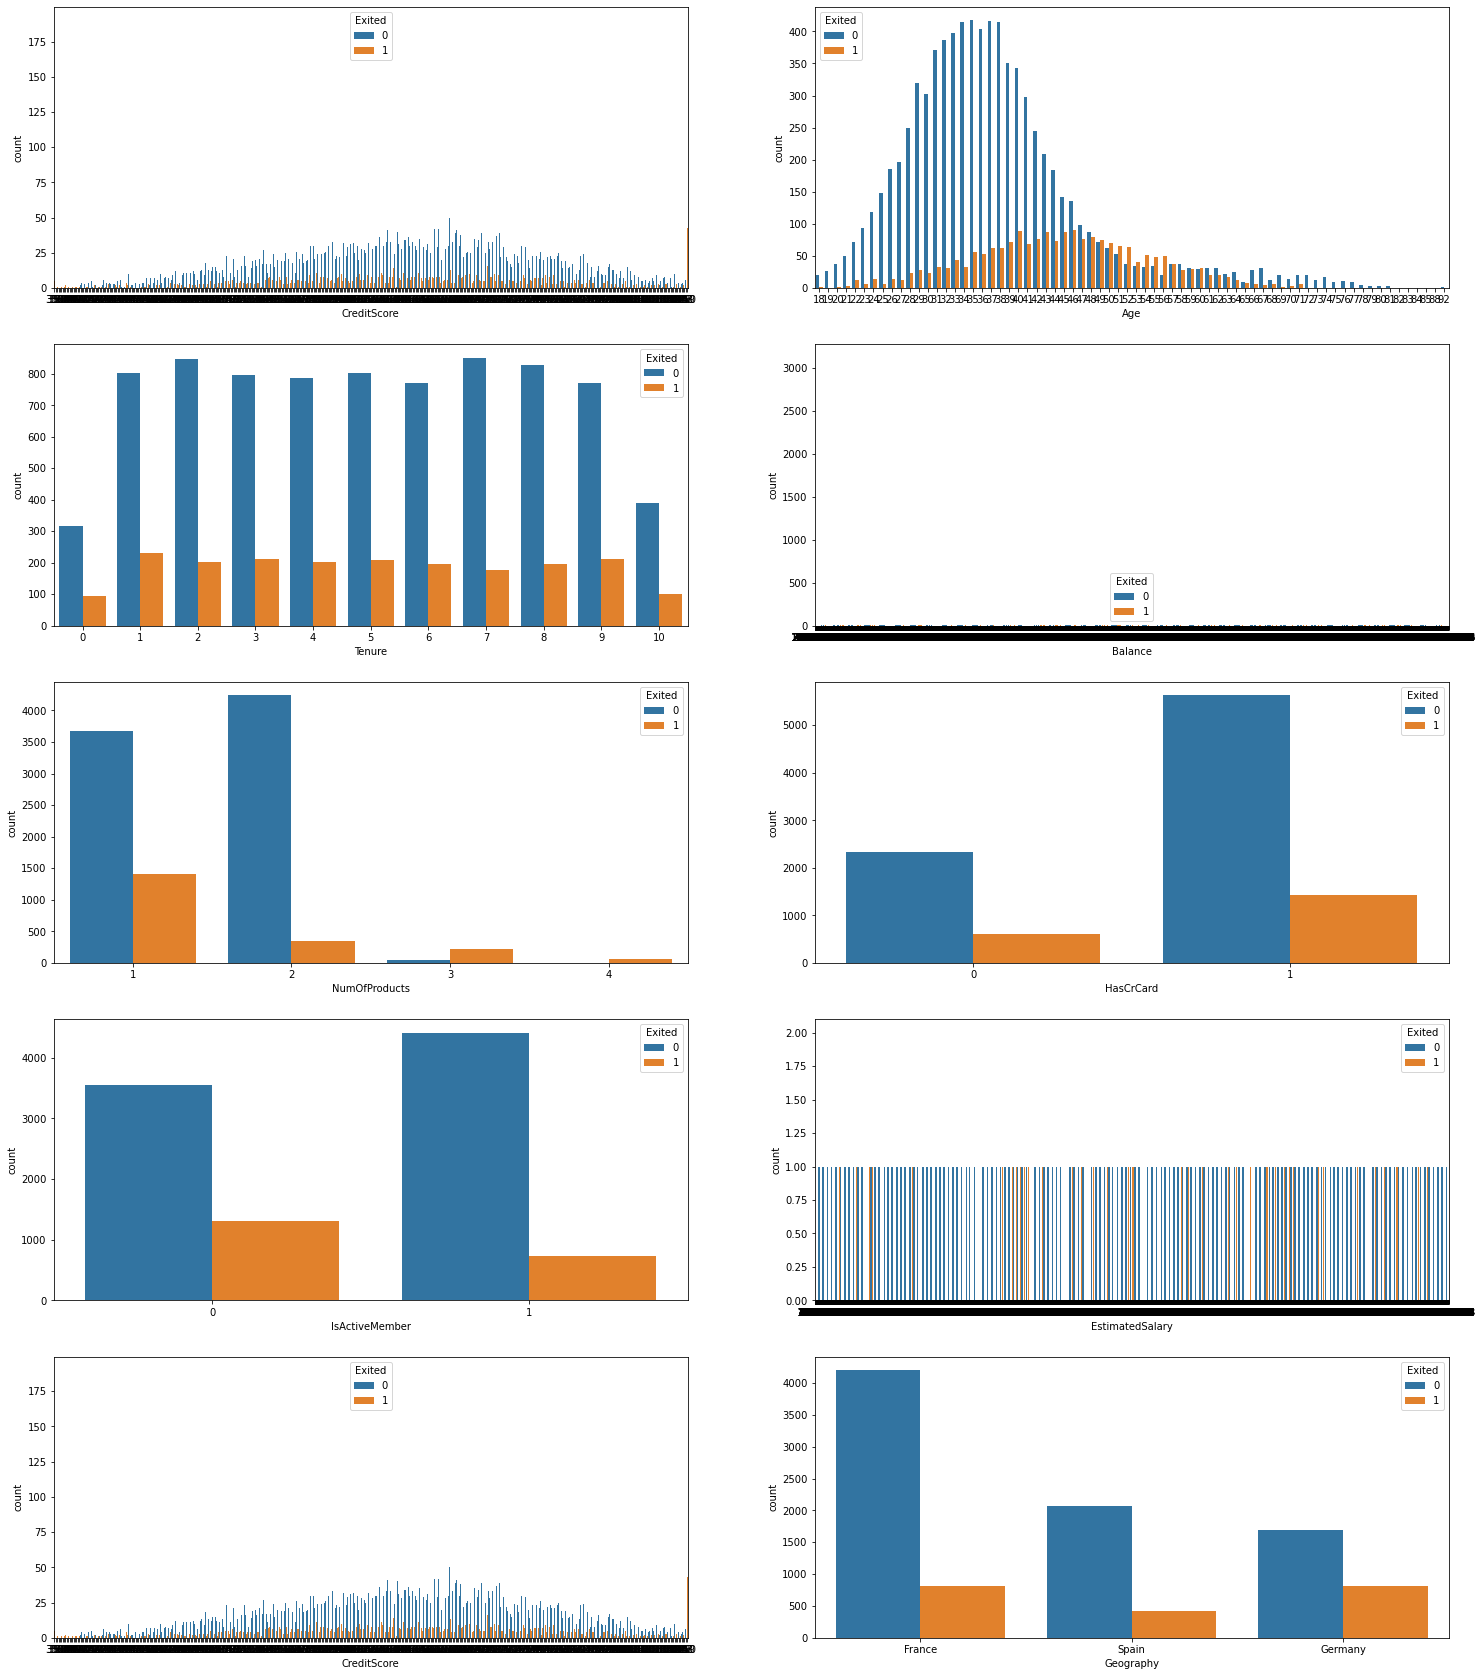

In [48]:
cust_beh= ['CreditScore','Age','Tenure','Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary','CreditScore','Geography']
fig, axes= plt.subplots(5,2, figsize=(25,30))
for cb, ax in zip(cust_beh, axes.flatten()):
    sns.countplot(cb, data= data, hue= 'Exited', ax=ax)

In [41]:
Usia= data_eda['Age'].value_counts()/len(data)*100
Usia.head(20)

37    4.78
38    4.77
35    4.74
36    4.56
34    4.47
33    4.42
40    4.32
39    4.23
32    4.18
31    4.04
41    3.66
29    3.48
30    3.27
42    3.21
43    2.97
28    2.73
44    2.57
45    2.29
46    2.26
27    2.09
Name: Age, dtype: float64

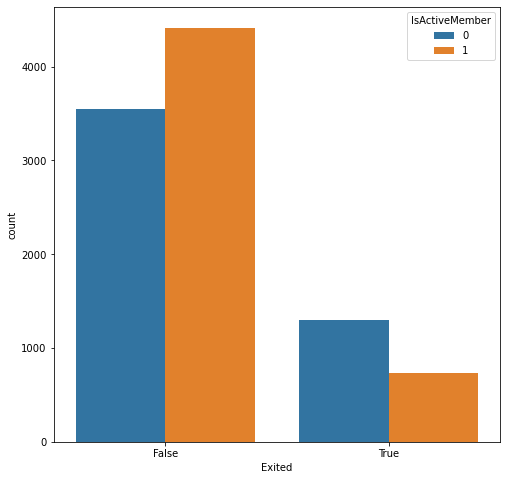

In [53]:
plt.figure(figsize=(8,8))
sns.countplot(data['Exited']==1, hue= data['IsActiveMember'] )

In [54]:
data['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

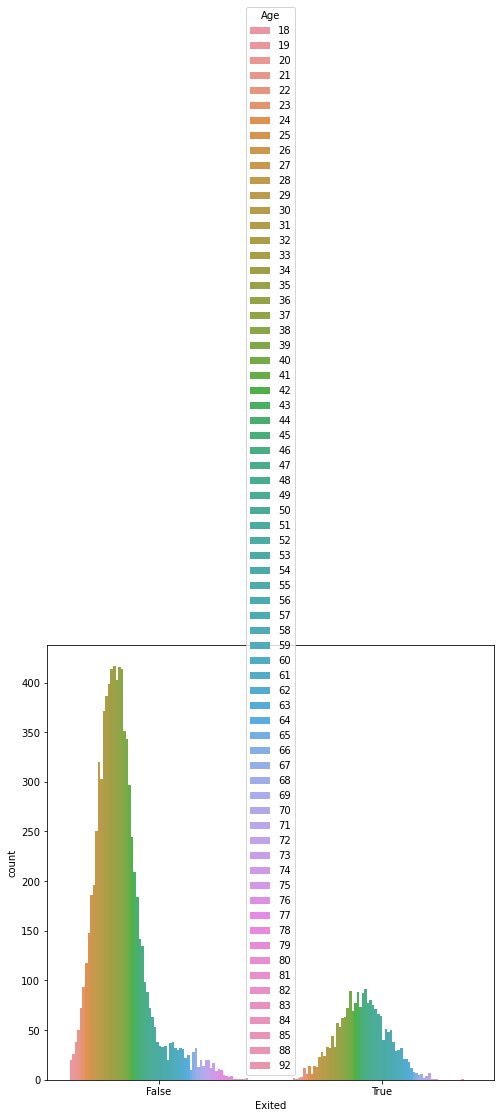

In [52]:
plt.figure(figsize=(8,8))
sns.countplot(data['Exited']==1, hue= data['Age'] )

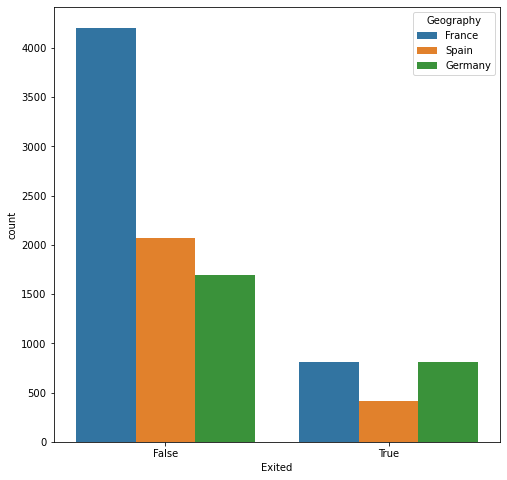

In [45]:
plt.figure(figsize=(8,8))
sns.countplot(data['Exited']==1, hue= data['Geography'] )

In [47]:
data_eda['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

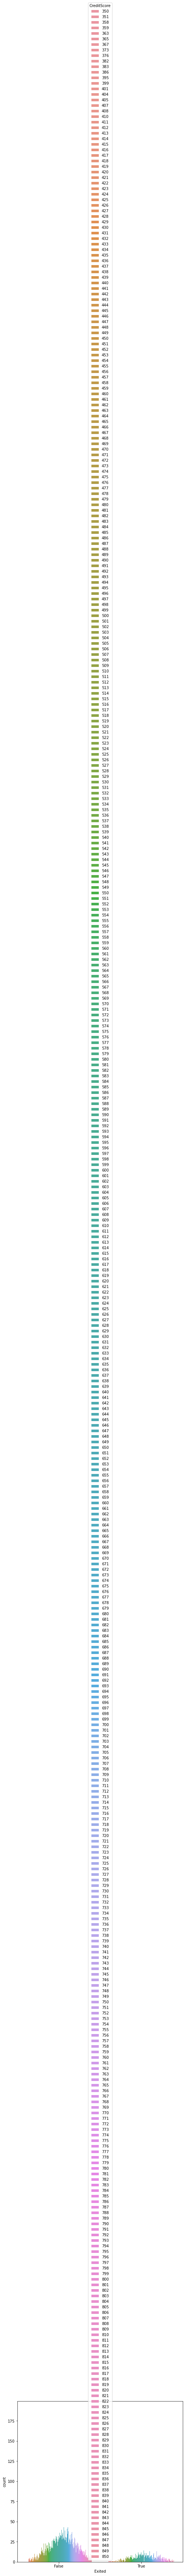

In [49]:
plt.figure(figsize=(8,8))
sns.countplot(data['Exited']==1, hue= data['CreditScore'] )

######


Insight gathered for Management:

* Geographycal
The customers listed are from 3 countries which are France 50%, Spain 25%, and Germany 25% with the amount of customers which exited from those countries are about 
France: 800 customers
Spain: 350 customers
Germany: 800 customers

* Age
The customers age are ranging from 18 years old to 92 years old. with most of the customers are grouped within 30-40 years old.
while the customers which are exited are mainly grouped within range 40-50 years old

* is Active Member
the customers active status are divided almost evenly with 51% is active, and 49% is not active.
while among the customers which are exited, the number was mainly divided with majority are from the non active customers.

* has credit card
the number of customers which exited was majority filled with the customers which has credit card

* Num of products
the number of customers which exited was majority filled with customers which are only using 1 products from the bank. the order was 1->2->3->4, with more products they were using the less likely they exited.



In [56]:
data_eda

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [62]:
data_eda = data_eda.drop(['CustomerId'], axis=1)
data_eda

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [63]:
data_eda.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Preprocessing scheme:

one hot: untuk data unit yg sedikit (Geography,Gender)
scaling: untuk data yang terlalu banyak nilai uniknya (CreditScore,Balance,EstimatedSalary)

In [82]:
transformer= ColumnTransformer([
    ('one hot', OneHotEncoder(drop= 'first'), ['Geography','Gender'])
],remainder= 'passthrough')

transformerknn= ColumnTransformer([
    ('one hot', OneHotEncoder(drop= 'first'), ['Geography','Gender']),
    ('scaling', StandardScaler(), ['CreditScore','Balance','EstimatedSalary'])
],remainder= 'passthrough')

In [83]:
transformer.fit_transform(data)

array([[0.0, 0.0, 0.0, ..., 1, 101348.88, 1],
       [0.0, 1.0, 0.0, ..., 1, 112542.58, 0],
       [0.0, 0.0, 0.0, ..., 0, 113931.57, 1],
       ...,
       [0.0, 0.0, 0.0, ..., 1, 42085.58, 1],
       [1.0, 0.0, 1.0, ..., 0, 92888.52, 1],
       [0.0, 0.0, 0.0, ..., 0, 38190.78, 0]], dtype=object)

In [84]:
transformerknn.fit_transform(data)

array([[0.0, 0.0, 0.0, ..., 1, 1, 1],
       [0.0, 1.0, 0.0, ..., 0, 1, 0],
       [0.0, 0.0, 0.0, ..., 1, 0, 1],
       ...,
       [0.0, 0.0, 0.0, ..., 0, 1, 1],
       [1.0, 0.0, 1.0, ..., 1, 0, 1],
       [0.0, 0.0, 0.0, ..., 1, 0, 0]], dtype=object)

In [68]:
X= data_eda.drop(['Exited'], axis= 1)
y= data_eda['Exited']

In [69]:
X.shape, y.shape

((10000, 10), (10000,))

karena di bisnis perhotelan, jika diprediksi tidak cancel ada konfirmasi kedatangan sebelum adanya tindakan lebih lanjut
* FP: hotel menganggap customer cancel dan menjual ruangan ke customer lain, customer pertama datang dan tidak bisa check in **(ada kerugian reputasi menurun karena review jelek dan harus membayar ganti rugi ke customer)**
* FN: hotel memastikan kedatangan customer, jadi hotel tidak rugi persiapan kedatangan customer. namun kemungkinan ruangan sulit untuk dijual kembali karena waktu, jadi tergantung waktu konfirmasi hotel ke customer **(ada kerugian karena sulit dijual kembali)**

Kedua kesalahan prediksi ini mengakibatkan kerugian finansial karena FP memungkinkan adanya ganti rugi dan tentunya reputasi yang akan menurun (kerugian finansial jangka panjang), sedangkan FN memungkinkan adanya kesulitan untuk menjual kamar cancel ke orang lain (tidak mendapat revenue). Perusahaan harus berusaha menekan kesalahan prediksi keduanya, jadi metric yang di gunakan untuk menekan hal tsb menggunakan f1.

* 0: not Exited
* 1: Exited

TN: Diprediksi ga exit, kenyataannya memang ga exit
TP: Diprediksi exit, kenyataannya memang exit

FP: Diprediksi exit, kenyataannya ternyata tidak exit
FN: Diprediksi tidak exit, kenyataannya ternyata exit

Dalam bisnis perbankan, 
* FP: perusahaan menganggap customer akan exit, sedangkan ternyata tidak. hal ini tentu akan memberikan potential loss dari payable yg tertunda dari customers tersebut (apabila memiliki produk yang belum dibayarkan fee nya)
      hal ini akan memberikan image yang buruk terhadap perusahaan, yang nantinya akan juga memberikan dampak finansial loss jangka panjang.
* FN: perusahaan memprediksi customer tidak akan exit, namun kenyataannya akan exit. selama hal ini tetap dibiarkan, akan ada biaya tertunggak yang akan lebih besar dikarenakan produk customer ini akan selalu aktif, dan billing akan terus berjalan.         
      kondisi ini akan menyebabkan potential loss yang tidak terukur dikarenakan kita ketidak tahuan kita kalau ternyata customer sudah exit

maka dari itu, yang lebih urgent menurut saya adalah menekan kemunculan FN

Model yang digunakan:

Logistic Regresi
Melakukan klasifikasi dengan membuat kurva berdasarkan data yang dipelajari

K-Nearest Neighbors
Melakukan klasifikasi dengan melihat data k tetangga terdekat disekelilingnya (k merupakan jumlah tetangga terdekat) dan memprediksi berdasarkan mayoritas data

Decision Tree
Melakukan klasifikasi dengan membuat struktur pohon, dan membuat true/false statement sesuai dengan karakteristik data

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify = y,
                                                   test_size = 0.25,
                                                   random_state = 2021)

In [89]:
logreg= LogisticRegression()
knn= KNeighborsClassifier()
tree= DecisionTreeClassifier(random_state= 2021)

logreg_pipe= Pipeline([('transformer', transformer),('model',logreg)])
knn_pipe= Pipeline([('transformer', transformerknn),('model', knn)])
tree_pipe= Pipeline([('transformer', transformer),('model', tree)])

list_pipe= [logreg_pipe, knn_pipe, tree_pipe]

def model_evaluation(list_pipe, scoring):
    skfold= StratifiedKFold(n_splits=5)
    df= pd.DataFrame(columns= ['Model','mean cv','std cv'])
    for i in list_pipe:
        arr = cross_val_score(i, X_train, y_train, scoring= scoring,cv=skfold)
        df = df.append({'Model':str(i[-1]).split('(')[0], 'mean cv':arr.mean(),'std cv':arr.std()}, ignore_index=True)
    return df

def recall(list_pipe):
    df= pd.DataFrame(columns= ['Model','recall score'])
    for i in list_pipe:
        i.fit(X_train, y_train)
        pred= i.predict(X_test)
        arr= recall_score(y_test, pred)
        df= df.append({'Model': str(i[-1]).split('(')[0], 'recall score': arr}, ignore_index= True)
    return df

model_score= model_evaluation(list_pipe, 'recall')
recall_result= recall(list_pipe)

model_score= model_score.merge(recall_result)
model_score.sort_values('recall score', ascending= False)

,Model,mean cv,std cv,recall score
2,DecisionTreeClassifier,0.509808,0.010176,0.508841
1,KNeighborsClassifier,0.312836,0.029084,0.302554
0,LogisticRegression,0.046472,0.025952,0.043222


nilai std yang kecil dan recall yg besar diberikan oleh metode decision tree

In [90]:
tree_pipe.fit(X_train,y_train)
print(classification_report(y_test,tree_pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      1991
           1       0.52      0.51      0.51       509

    accuracy                           0.80      2500
   macro avg       0.70      0.69      0.69      2500
weighted avg       0.80      0.80      0.80      2500



In [91]:
rus= RandomUnderSampler(random_state= 2021)

logreg= LogisticRegression()
knn= KNeighborsClassifier()
tree= DecisionTreeClassifier(random_state= 2021)

logreg_pipe_rus= Pipeline([('transformer', transformer),('rus',rus),('model',logreg)])
knn_pipe_rus= Pipeline([('transformer', transformerknn),('rus',rus),('model', knn)])
tree_pipe_rus= Pipeline([('transformer', transformer),('rus',rus),('model', tree)])

list_pipe_rus= [logreg_pipe_rus, knn_pipe_rus, tree_pipe_rus]

def model_evaluation_rus(list_pipe, scoring):
    skfold= StratifiedKFold(n_splits=5)
    df= pd.DataFrame(columns= ['Model','mean cv','std cv'])
    for i in list_pipe:
        arr = cross_val_score(i, X_train, y_train, scoring= scoring,cv=skfold)
        df = df.append({'Model':str(i[-1]).split('(')[0]+ ' Undersampler', 'mean cv':arr.mean(),'std cv':arr.std()}, ignore_index=True)
    return df

def recall_rus(list_pipe):
    df= pd.DataFrame(columns= ['Model','recall score'])
    for i in list_pipe:
        i.fit(X_train, y_train)
        pred= i.predict(X_test)
        arr= recall_score(y_test, pred)
        df= df.append({'Model': str(i[-1]).split('(')[0]+ ' Undersampler', 'recall score': arr}, ignore_index= True)
    return df

model_score_rus= model_evaluation_rus(list_pipe_rus, 'recall')
recall_result_rus= recall_rus(list_pipe_rus)

model_score_rus= model_score_rus.merge(recall_result_rus)
model_score_rus.sort_values('recall score', ascending= False)

,Model,mean cv,std cv,recall score
2,DecisionTreeClassifier Undersampler,0.702207,0.038359,0.697446
0,LogisticRegression Undersampler,0.666287,0.042844,0.666012
1,KNeighborsClassifier Undersampler,0.662972,0.029184,0.616896


In [93]:
tree_pipe_rus.fit(X_train,y_train)
print(classification_report(y_test,tree_pipe_rus.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1991
           1       0.39      0.70      0.50       509

    accuracy                           0.71      2500
   macro avg       0.65      0.71      0.65      2500
weighted avg       0.80      0.71      0.74      2500



In [94]:
ros= RandomOverSampler(random_state= 2021)

logreg= LogisticRegression()
knn= KNeighborsClassifier()
tree= DecisionTreeClassifier(random_state= 2021)

logreg_pipe_ros= Pipeline([('transformer', transformer),('ros',ros),('model',logreg)])
knn_pipe_ros= Pipeline([('transformer', transformerknn),('ros',ros),('model', knn)])
tree_pipe_ros= Pipeline([('transformer', transformer),('ros',ros),('model', tree)])

list_pipe_ros= [logreg_pipe_ros, knn_pipe_ros, tree_pipe_ros]

def model_evaluation_ros(list_pipe, scoring):
    skfold= StratifiedKFold(n_splits=5)
    df= pd.DataFrame(columns= ['Model','mean cv','std cv'])
    for i in list_pipe:
        arr = cross_val_score(i, X_train, y_train, scoring= scoring,cv=skfold)
        df = df.append({'Model':str(i[-1]).split('(')[0]+ ' Undersampler', 'mean cv':arr.mean(),'std cv':arr.std()}, ignore_index=True)
    return df

def recall_ros(list_pipe):
    df= pd.DataFrame(columns= ['Model','recall score'])
    for i in list_pipe:
        i.fit(X_train, y_train)
        pred= i.predict(X_test)
        arr= recall_score(y_test, pred)
        df= df.append({'Model': str(i[-1]).split('(')[0]+ ' Undersampler', 'recall score': arr}, ignore_index= True)
    return df

model_score_ros= model_evaluation_ros(list_pipe_ros, 'recall')
recall_result_ros= recall_ros(list_pipe_ros)

model_score_ros= model_score_ros.merge(recall_result_ros)
model_score_ros.sort_values('recall score', ascending= False)

,Model,mean cv,std cv,recall score
0,LogisticRegression Undersampler,0.654467,0.020978,0.662083
1,KNeighborsClassifier Undersampler,0.627627,0.024470,0.616896
2,DecisionTreeClassifier Undersampler,0.500643,0.020695,0.463654


In [95]:
logreg_pipe_ros.fit(X_train,y_train)
print(classification_report(y_test,logreg_pipe_ros.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.48      0.61      1991
           1       0.25      0.66      0.36       509

    accuracy                           0.52      2500
   macro avg       0.55      0.57      0.48      2500
weighted avg       0.72      0.52      0.56      2500



In [96]:
estimator= Pipeline([
    ('transformer', transformer),
    ('rus',rus),
    ('model', tree)
])

hyperparam_space= {
    'model__criterion': ['gini', 'entropy'], #kriteria untuk menghitung informasi data
    'model__min_samples_split': [i for i in range(1,50,2)], #Nilai minimum sample untuk membagi jumlah node 
    'model__min_samples_leaf': [i for i in range(1,20)] #Nilai minimum sample yang dibutuhkan untuk berada di daun
}

grid= GridSearchCV(
    estimator,
    param_grid = hyperparam_space,
    cv = StratifiedKFold(n_splits = 5),
    scoring = 'recall',
    n_jobs = -1)

In [97]:
grid.fit(X_train,y_train)
print('best score', grid.best_score_)
print('best_param', grid.best_params_)

best score 0.758465659487839
best_param {'model__criterion': 'gini', 'model__min_samples_leaf': 19, 'model__min_samples_split': 45}
